## 0 Step. Example Datasets

Hello, world ! 


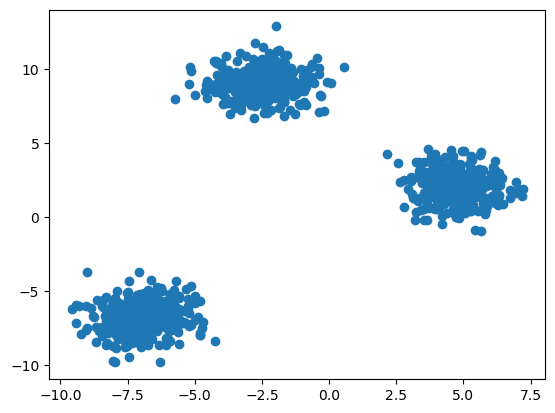

In [51]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

n_samples = 1000

X, y = make_blobs(n_samples=n_samples, random_state=42)

print("Hello, world ! ")

plt.scatter(X[:,0], X[:,1])
plt.show()

# DBSCAN Pseudo-Code

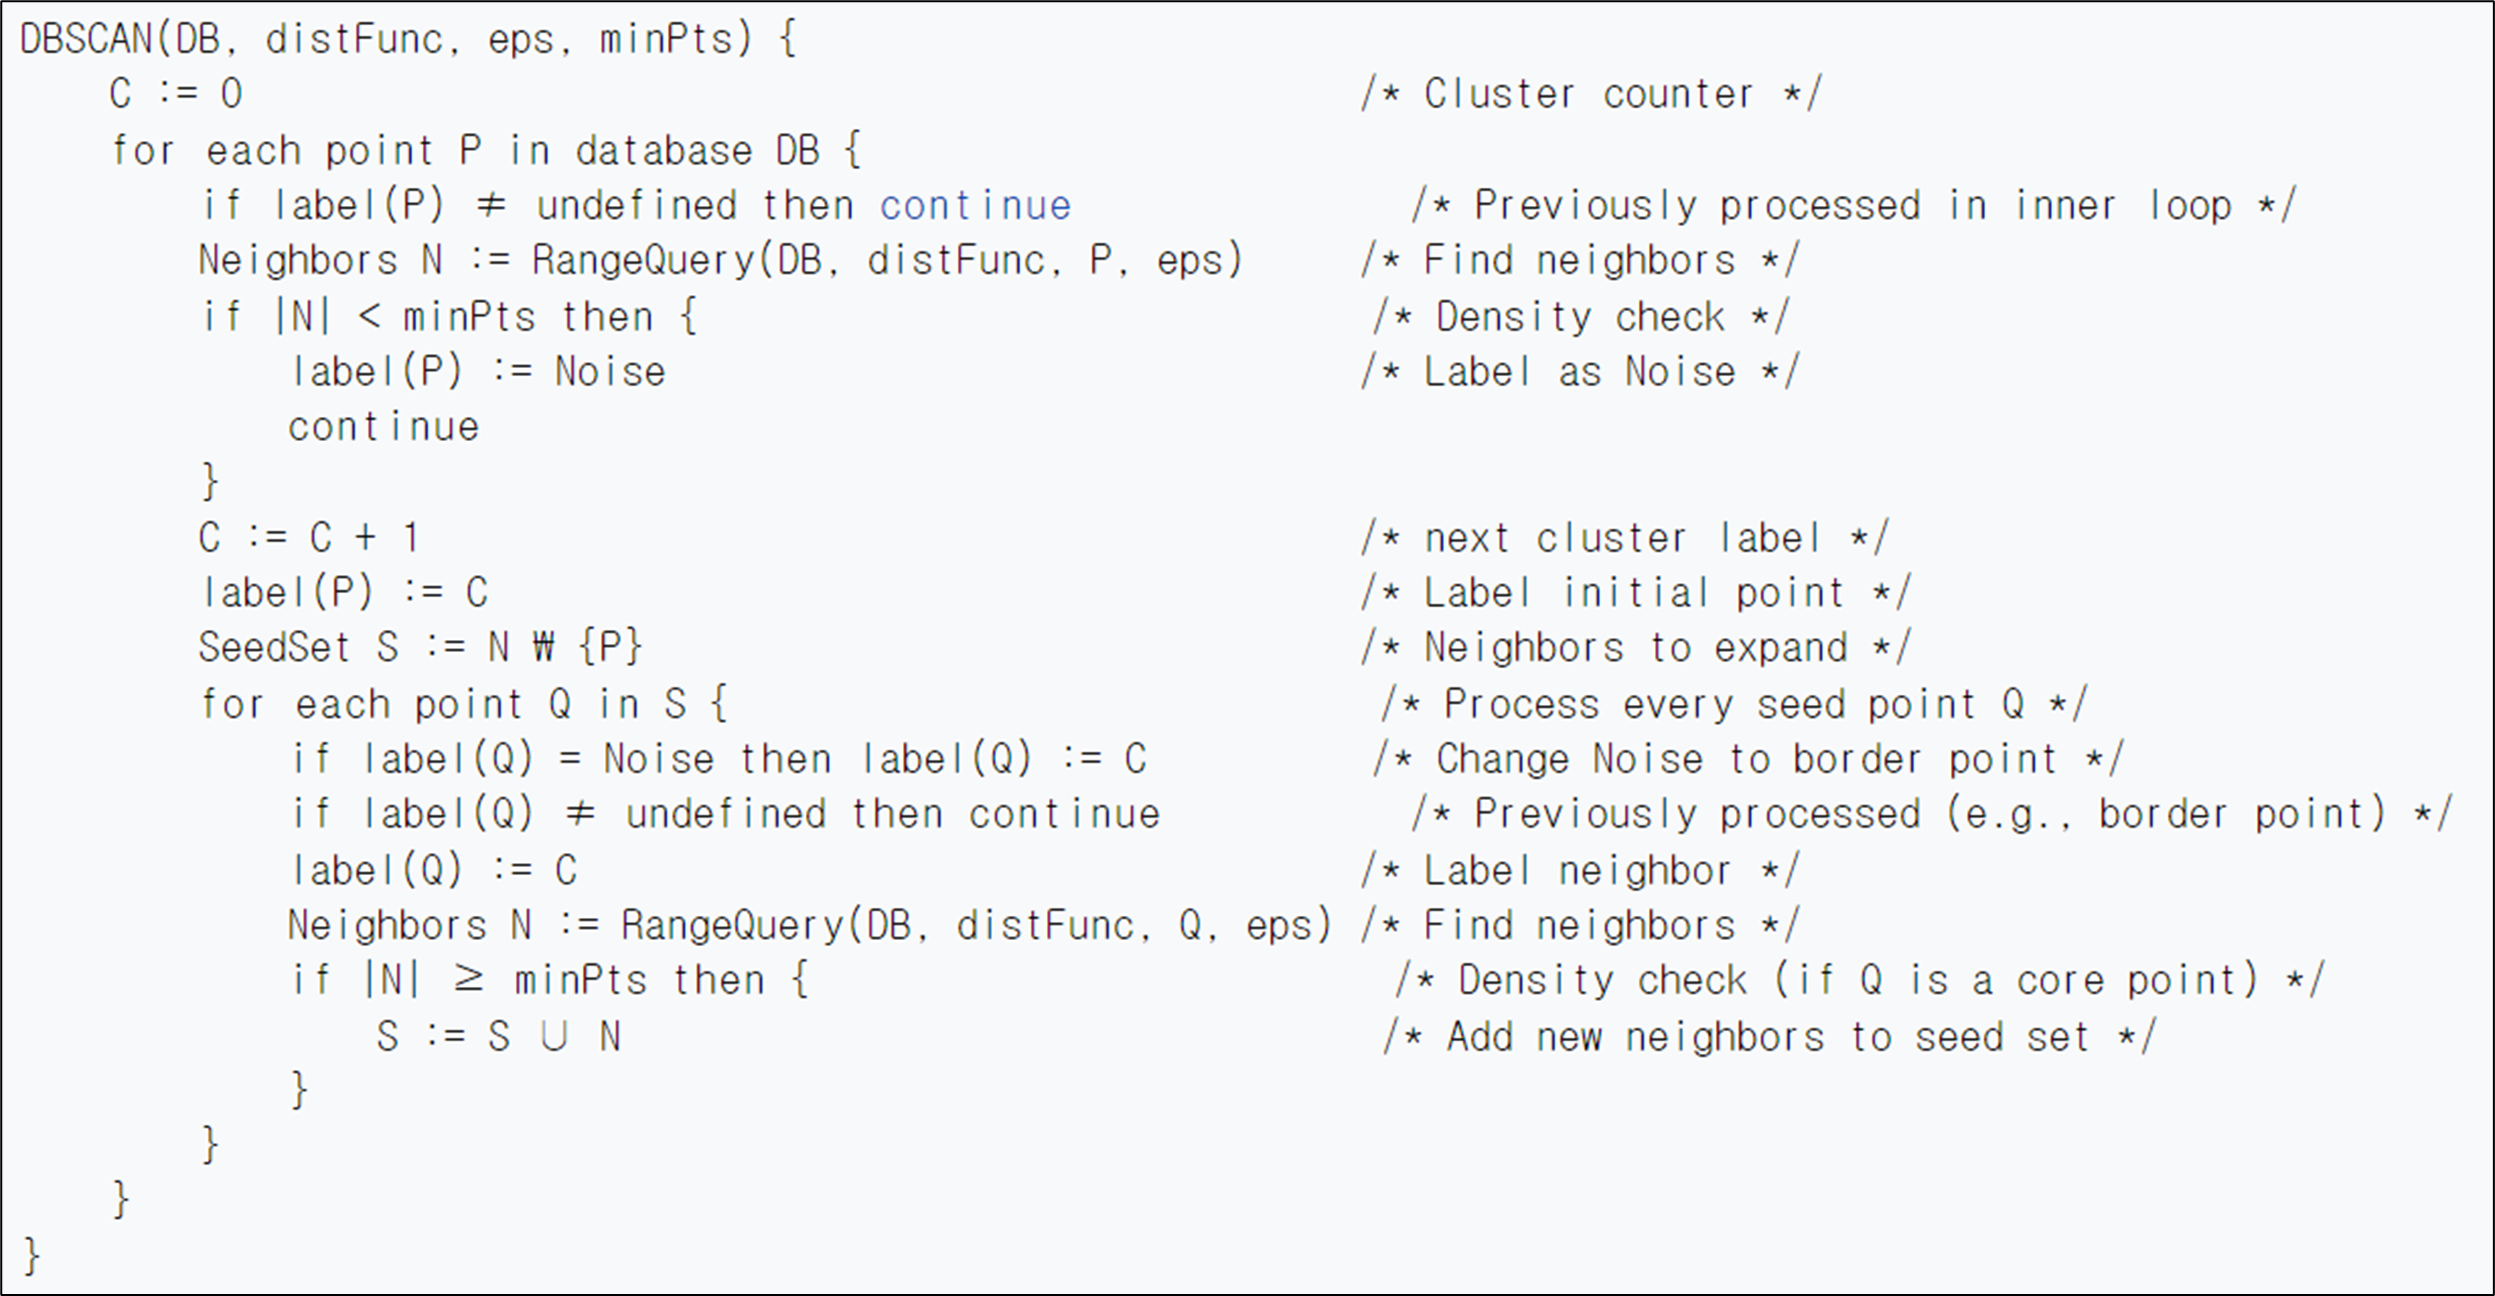

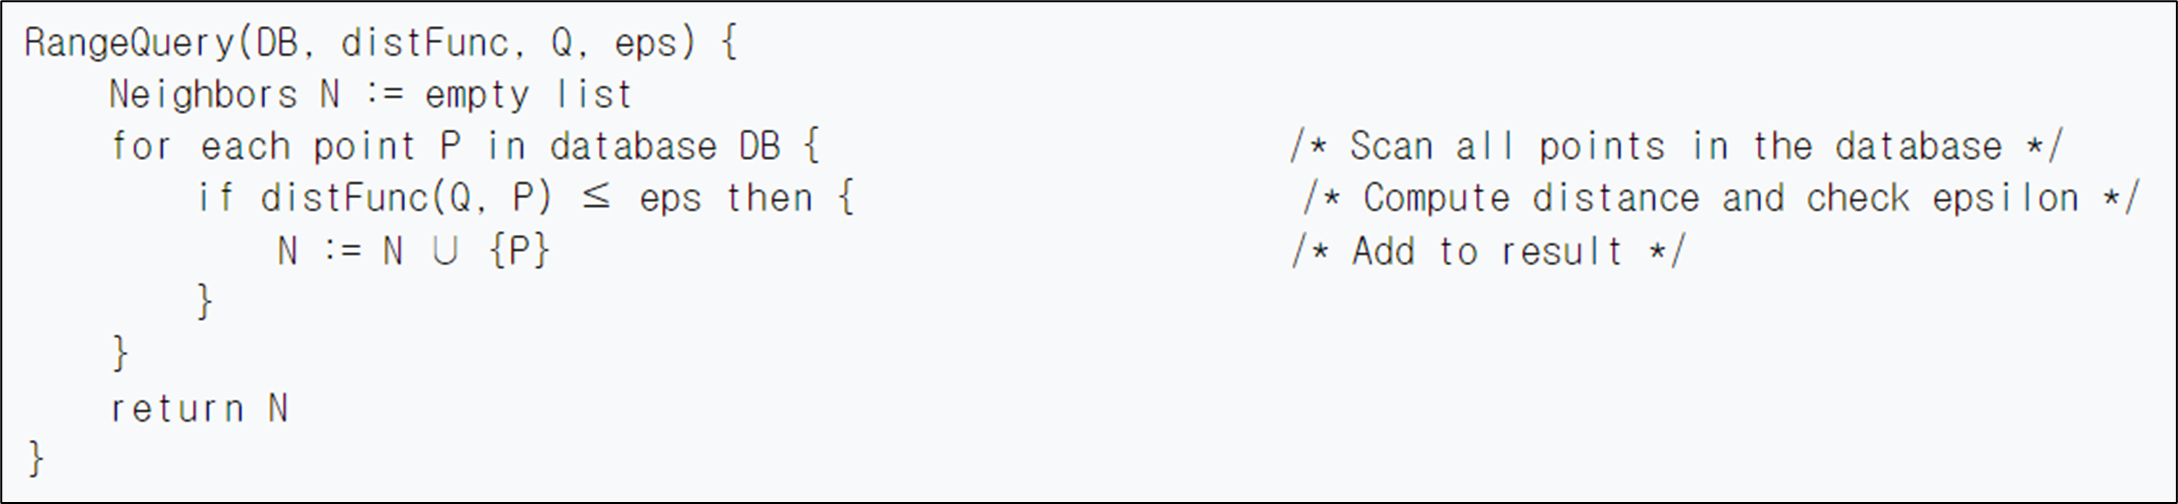

## Standard Version


In [52]:
import numpy as np

NOISE = -1

class MyDBSCAN:
    def __init__(self, eps=0.5, min_points=5):
        self.eps = eps
        self.min_points = min_points
        self.X = None

    def fit(self, X):
        self.X_ = X
        self.n_samples = self.X_.shape[0]
        self.n_clusters = 0

        self.labels_ = np.zeros(self.n_samples, dtype=int)
        self.visited_ = np.zeros(self.n_samples, dtype=bool)

        self.core_index = []
        self.border_index = []

        for i in range(self.n_samples):
            if self.visited_[i]:
                continue
            self.visited_[i] = True

            neighbors = self.range_query(self.X_[i])
            
            if len(neighbors) < self.min_points:
                self.labels_[i] = NOISE
                continue

            self.n_clusters += 1
            self.labels_[i] = self.n_clusters

            for neighbor in neighbors:
                if self.labels_[neighbor] == NOISE:
                    self.labels_[neighbor] = self.n_clusters
                if self.visited_[neighbor]:
                    continue
                self.visited_[neighbor] = True

                self.labels_[neighbor] = self.n_clusters
                new_neighbors = self.range_query(self.X_[neighbor])
                if len(new_neighbors) >= self.min_points:
                    for new_neighbors in new_neighbors:
                        neighbors.append(new_neighbors)

        return self.labels_

    def expand_cluster(self, ):
        self.expand_cluster()
        pass

    def range_query(self, x):
        distance = np.linalg.norm(x-self.X_, axis=1)
        neighbors_index = np.where(distance <= self.eps)[0].tolist()

        return neighbors_index

In [53]:
def display_result(labels, title):
    result_dict = dict()
    for idx, label in enumerate(labels):
        if label not in result_dict.keys():
            result_dict[label] = list()
            result_dict[label].append([ X[idx, 0], X[idx, 1]])
        else:
            result_dict[label].append([ X[idx, 0], X[idx, 1]])

    for key, value in result_dict.items():
        print(key, len(value))

    for key, value in result_dict.items():
        data = np.array(value)
        plt.scatter(data[:,0], data[:,1], label=f"{key}")
    plt.title(title)
    plt.legend()
    plt.show()

1 321
2 324
3 320
-1 35


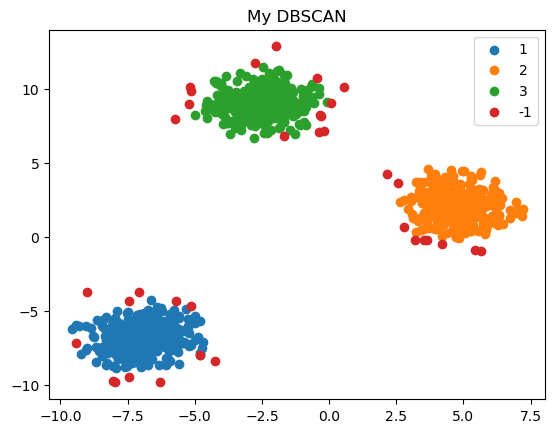

In [54]:
my_dbscan = MyDBSCAN(eps=0.5, min_points=5)
labels = my_dbscan.fit(X)
display_result(labels, "My DBSCAN")

## Recursive Version